# Exercício 1

**Aluno:** Franklin Oliveira <br>
**Profa.:** Asla Medeiros e Sá

## Proposta

O objetivo deste primeiro exercício, segundo a professora, é avaliar o conhecimento prévio de cada aluno sobre bibliotecas e técnicas de visualização. Além disso, espera-se que cada aluno organize  seu ambiente de trabalho (um "Hello Graphics World" documentado).

Assim, foi pedido que cada aluno:

> - Escolha a ferramenta na qual pretende investir ao longo da disciplina.<br>
> - A partir da linguagem escolhida, produza um scatterplot (gráfico de dispersão) explorando diversas alternativas de especificação gráfica que a linguagem ofereça.


**Sugestão:** Usar os mesmos dados deste [exemplo](https://observablehq.com/@uwdata/data-types-graphical-marks-and-visual-encoding-channels), que foi inspirado nos clássicos do Hans Rosling.     <br> 

_"We will visualize global health and population measures for countries of the world, recorded over the years 1955 to 2005. The data was collected by the Gapminder Foundation and shared in Hans Rosling's popular TED talk. (If you haven't seen the talk, we encourage you to watch it!)"_

-----

## Solução

### Escolha de ferramentas

Para acompanhar a disciplina, escolhi as seguintes ferramentas: 

- **Linguagem de Programação:** Python 3                    <br>
- **Ambiente de Desenvolvimento (IDE):** Jupyter Notebook   <br>
- **Biblioteca gráfica:** Altair

<br>

### Construção do *scatter plot*

Vamos começar fazendo o *import* de algumas bibliotecas...

<font color='red'>**OBS:** Executar cada célula para visualizar o *output* correto - algumas visualizações dinâmicas não são carregadas automaticamente ao abrir o notebook.</font>


In [21]:
import pandas as pd
import altair as alt

# ativando renderizador do notebook
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

**Importando *dataset* do gapminder** (divulgado no [TED Talk de Rans Hosling](https://www.youtube.com/watch?v=hVimVzgtD6w))

In [2]:
from vega_datasets import data

In [3]:
gap = data.gapminder()
gap.head()

,year,country,cluster,pop,life_expect,fertility
0,1955,Afghanistan,0,8891209,30.332,7.7
1,1960,Afghanistan,0,9829450,31.997,7.7
2,1965,Afghanistan,0,10997885,34.020,7.7
3,1970,Afghanistan,0,12430623,36.088,7.7
4,1975,Afghanistan,0,14132019,38.438,7.7


Esse *dataset* contém informações de sobre **saúde mundial** e **medidas populacionais** para vários países. Vamos começar explorando e conhecendo um pouco mais esse conjunto de dados...

In [4]:
print('Nº de observações:', gap.shape[0])
print('Nº de colunas:', gap.shape[1])

Nº de observações: 693
Nº de colunas: 6


In [5]:
print('Colunas:', gap.columns.values)

Colunas: ['year' 'country' 'cluster' 'pop' 'life_expect' 'fertility']


Para cada país, a cada 5 anos, temos registros de **fertilidade** (número de filhos por mulher), **expectativa de vida** (em anos) e **população total**. Também vemos que esses dados já foram clusterizados (coluna `cluster`). Vamos utilizar essa feature quando construirmos a visualização.

Por ora, vamos explorar um pouco mais...

In [6]:
print('Nº de países:', len(gap['country'].unique()))

# OBS: todos os países têm o mesmo número de registros
print('\nNº de registros por país:', gap.groupby('year')['country'].count().value_counts().values[0]) 

Nº de países: 63

Nº de registros por país: 11


In [7]:
print('Os dados vão de {} a {}, com uma frequência de {} em {} anos.'.format(min(gap['year']), 
                                                                    max(gap['year']), 5, 5))
print('\nAnos de registro:', list(gap['year'].unique()))

Os dados vão de 1955 a 2005, com uma frequência de 5 em 5 anos.

Anos de registro: [1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005]


In [8]:
print('Número de clusteres:', gap['cluster'].unique().shape[0])

Número de clusteres: 6


Agora, vamos à visualização. Primeiro, faremos um *scater plot* simples e, aos poucos, vamos melhorando-o adicionando mais informações e elementos gráficos. A ideia é ilustrar os recursos do Altair ao mesmo tempo em que exercitamos boas práticas de visualização.

Nesse *dataset*, estamos particularmente interessados em observar a relação entre as variáveis: `life_expect`(expectativa de vida) e `fertility`(fertilidade). Então, vamos colocá-las no eixo Y e X, respectivamente.

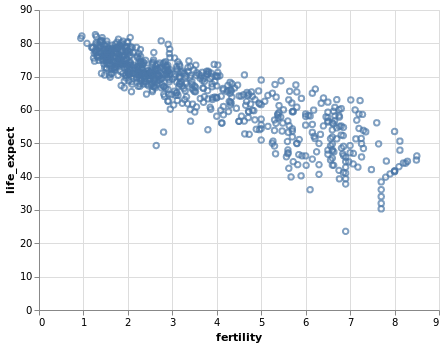

In [9]:
alt.Chart(gap).mark_point().encode(
    x= 'fertility',
    y= 'life_expect',
)

Vemos um grande aglomerado de pontos na parte superior esquerda do gráfico. Para melhorar isso, vamos filtrar as observações para o ano de 2005 (mais recente). Mais à frente, usaremos um recurso para conseguir visualizar todo o conjunto de dados sem esse entrave da sobreposição de um grande volume de pontos.

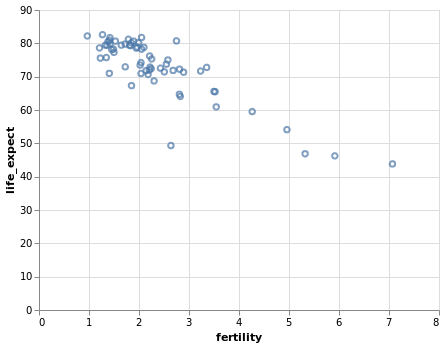

In [10]:
alt.Chart(gap[gap['year'] == 2005]).mark_point().encode(
    x= 'fertility',
    y= 'life_expect'
)

Ainda podemos melhorar alterando a escala dos eixos.

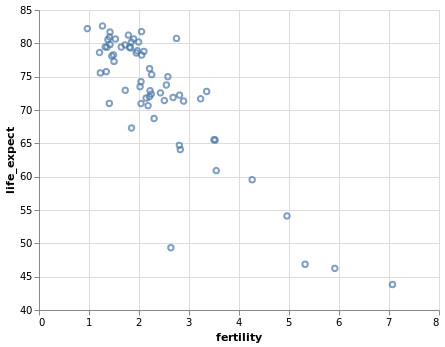

In [11]:
alt.Chart(gap[gap['year'] == 2005]).mark_point().encode(
    x= 'fertility',
    y= alt.Y('life_expect', scale=alt.Scale(domain=[40, 85])),
)

Agora estamos prontos para codificar as demais colunas. Vamos começar atribuindo o tamanho de cada ponto ao valor da coluna `pop`.

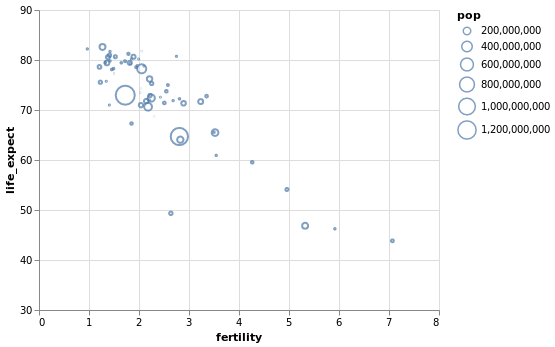

In [12]:
alt.Chart(gap[gap['year'] == 2005]).mark_point().encode(
    x= alt.X('fertility'),
    y= alt.Y('life_expect', scale= alt.Scale(domain=[30, 90])),
    size= alt.Size('pop'),
)

O tamanho dessas bolas ainda não está expressivo o bastante... Vamos aumentá-las.

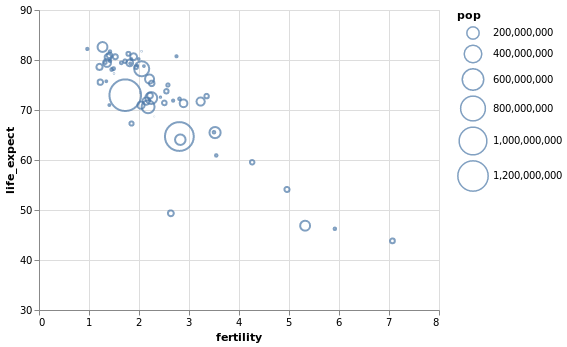

In [13]:
alt.Chart(gap[gap['year'] == 2005]).mark_point().encode(
    x= alt.X('fertility'),
    y= alt.Y('life_expect', scale= alt.Scale(domain=[30, 90])),
    size= alt.Size('pop', scale= alt.Scale(range=[0, 1000], zero=False)),
)

Agora, vamos adicionar um pouco de cor à esse gráfico...

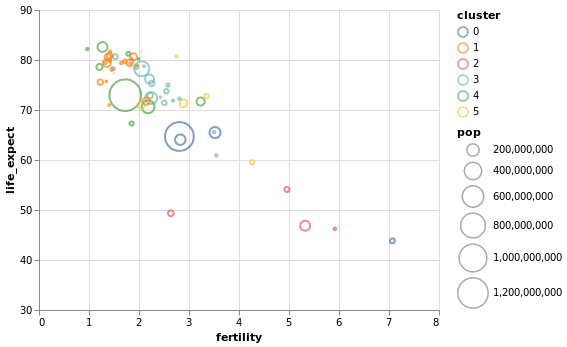

In [14]:
alt.Chart(gap[gap['year'] == 2005]).mark_point().encode(
    x= alt.X('fertility'),
    y= alt.Y('life_expect', scale= alt.Scale(domain=[30, 90])),
    size= alt.Size('pop', scale= alt.Scale(range=[0, 1000], zero=False)),
    color= alt.Color('cluster', type='nominal')
)

Está melhor, mas eu quero ainda mais cor...

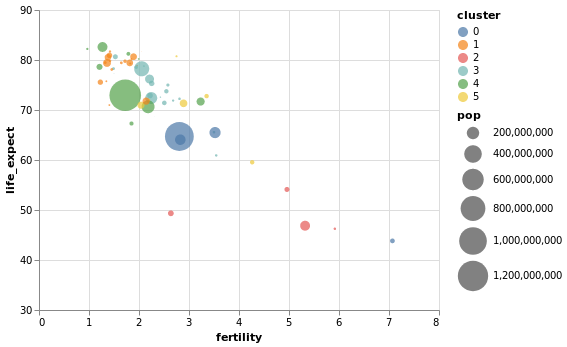

In [15]:
alt.Chart(gap[gap['year'] == 2005]).mark_point(filled=True).encode(
    x= alt.X('fertility'),
    y= alt.Y('life_expect', scale= alt.Scale(domain=[30, 90])),
    size= alt.Size('pop', scale= alt.Scale(range=[0, 1000], zero=False)),
    color= alt.Color('cluster', type='nominal')
)

Ótimo. Agora, vamos aos últimos retoques. Nesse passo, vamos incluir *tooltips*.

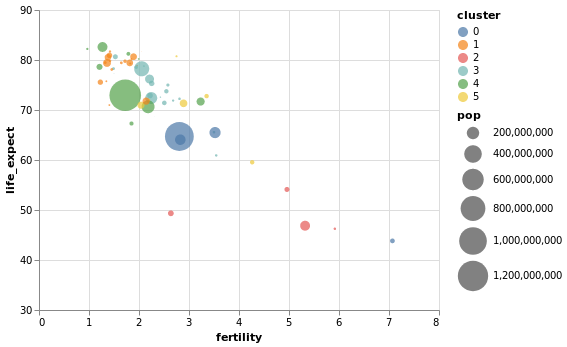

In [16]:
alt.Chart(gap[gap['year'] > 2000]).mark_point(filled=True).encode(
    x= alt.X('fertility'),
    y= alt.Y('life_expect', scale= alt.Scale(domain=[30, 90])),
    size= alt.Size('pop', scale= alt.Scale(range=[0, 1000], zero=False)),
    color= alt.Color('cluster', type='nominal'),
    tooltip= alt.Tooltip('country')
)

Assim, conseguimos identificar a que país cada ponto no gráfico pertence ao aproximar o mouse. No entanto, as bolas de tamanho maior estão sobreponto outros pontos, impedindo que identifiquemos alguns desses pontos que ficam no *background*. 

Para solucionar isso, vamos desenhar primeiro as bolas maiores, garantindo que as menores fiquem à frente.

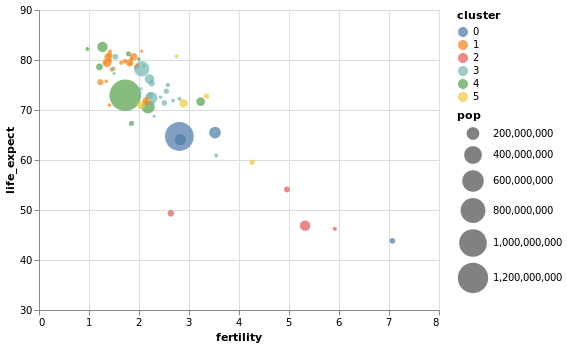

In [17]:
alt.Chart(gap[gap['year'] > 2000]).mark_point(filled=True).encode(
    x= alt.X('fertility'),
    y= alt.Y('life_expect', scale= alt.Scale(domain=[30, 90])),
    size= alt.Size('pop', scale= alt.Scale(range=[10, 1000], zero=False)),
    color= alt.Color('cluster', type='nominal'),
    tooltip= alt.Tooltip('country'),
    order= alt.Order('pop', sort='descending')
)

Para finalizar, vamos adicionar um filtro interativo (para conseguirmos visualizar os demais anos).

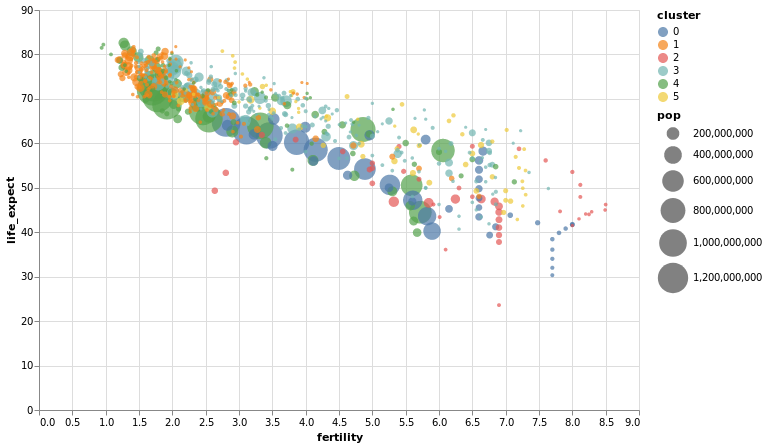

In [26]:
slider = alt.binding_range(min=1955, max=2005, step=5, name='Ano:')

selector = alt.selection_single(name="Year", fields=['year'],
                                bind=slider)

alt.Chart(gap).mark_point(filled=True).encode(
    x= alt.X('fertility'),
    y= alt.Y('life_expect', scale= alt.Scale(domain=[0, 90])),
    size= alt.Size('pop', scale= alt.Scale(range=[10, 1000], zero=False)),
    color= alt.Color('cluster', type='nominal'),
    tooltip= alt.Tooltip('country'),
    order= alt.Order('pop', sort='descending')
).properties(
    width=600,
    height=400
).add_selection(
    selector
).transform_filter(
    selector
).interactive()

**Fim.**